In [25]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline


In [46]:
# check out how the data looks
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [56]:
# get the features 
boston.feature_names 

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='<U7')

In [60]:
# Convert to dataframe with cols and also add the target column
# let the target be actual {in thousands of dollars}.
df = pd.DataFrame(boston.data,columns=[boston.feature_names]) 
df['TARGET'] = boston.target
df['TARGET'] = df['TARGET'].apply(lambda x:x*1000) 
df.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24000.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21600.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34700.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33400.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36200.0


In [64]:
# get the data {features} and Target{Price}
# features
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT']]
# target 
y = df['TARGET']


In [65]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [66]:
# fit and train the model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
lm.intercept_

31682.148582135134

In [74]:
# coefficient table for every unit increase 
codf=pd.DataFrame(lm.coef_,boston.feature_names,columns=['Coefficient'])
codf

,Coefficient
CRIM,-132.774155
ZN,35.781233
INDUS,49.945442
CHAS,3121.277059
NOX,-15469.846273
RM,4048.727208
AGE,-10.751590
DIS,-1386.997583
RAD,242.353741
TAX,-8.690954


In [84]:
# predictions 
predictions = lm.predict(X_test)
print((predictions))
print((y_test))

[ 28655.07151559  36502.08975848  15418.77538495  25412.34279908
  18845.04143925  23151.93132448  17390.45793862  14070.68504335
  23041.06391518  20599.79090294  24828.48981217  18529.72656138
  -6893.3871782   21806.47623025  19230.4470613   26182.84059108
  20280.99565326   5611.47028481  40445.18211294  17572.13703977
  27447.50834233  30175.92819101  10929.39394458  24019.23810422
  18062.77151557  15935.24273005  23137.84816677  14491.81123352
  22338.89889019  19327.32276047  22174.04589985  25197.24098431
  25314.14125426  18513.91364643  16608.98646835  17482.81643123
  30952.48869449  20191.96714702  23905.6638762   24873.31496812
  13936.1230122   31824.14012002  42564.92347207  17629.44480649
  27023.92519458  17189.11610352  13799.29973289  26107.39476133
  20314.03575763  30092.9680544   21316.86534481  34160.63850008
  15599.05068457  26112.82476444  39316.18827361  22990.94171684
  18950.2181566   33057.21471222  24853.73006476  12914.90043102
  22673.33429166  30795.7

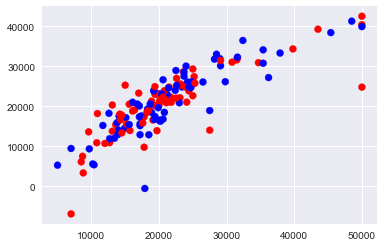

In [90]:
# red is the actual price, blue is the predicted
plt.scatter(y_test,predictions, c=['r','b'])
# plt.figlegend((y_test, predictions),
#            ('Actual', 'Predicted'),
#            'upper right' )

In [91]:
from sklearn import metrics

In [92]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3165.60523149
MSE: 21540218.9439
RMSE: 4641.14414169
